In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [73]:
dataset = pd.read_csv(r"C:\Users\USER\Desktop\Churn_Modelling (1).csv")

In [74]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [76]:
# Checking if our dataset contains any NULL values

dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [77]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

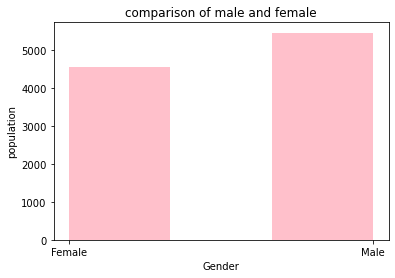

In [78]:
plt.hist(x = dataset.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [79]:
dataset['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

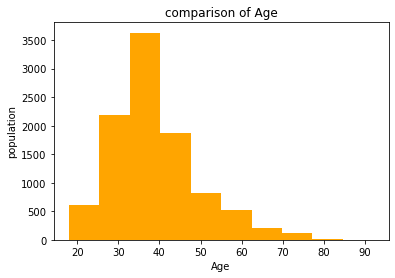

In [80]:
plt.hist(x = dataset.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [81]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

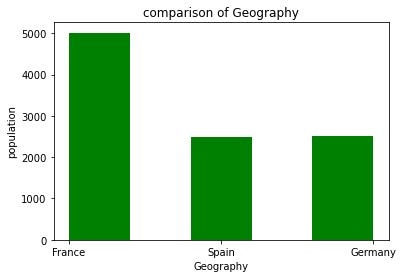

In [82]:
plt.hist(x = dataset.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [83]:
dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

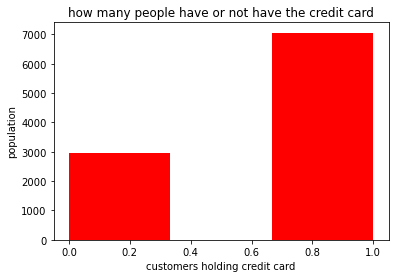

In [84]:
plt.hist(x = dataset.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [85]:
dataset['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

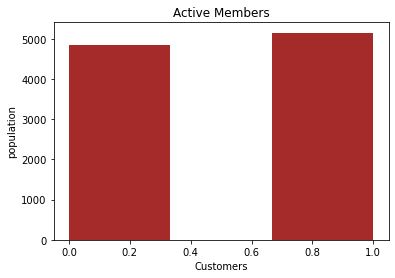

In [86]:
plt.hist(x = dataset.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

<AxesSubplot:xlabel='Gender'>

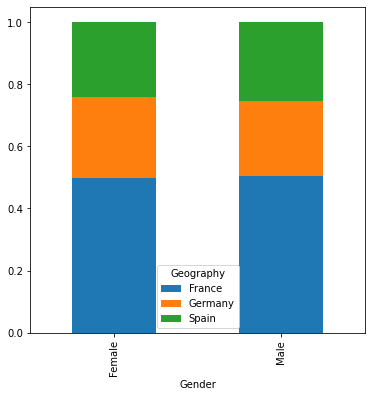

In [87]:
# comparison between Geography and Gender

Gender = pd.crosstab(dataset['Gender'],dataset['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

<AxesSubplot:xlabel='HasCrCard'>

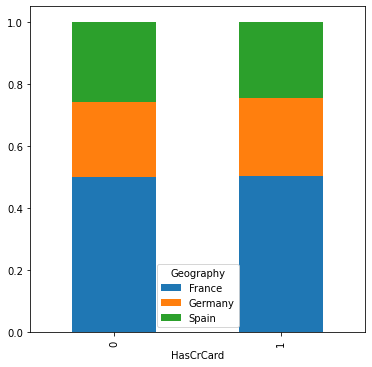

In [88]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(dataset['HasCrCard'], dataset['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

<AxesSubplot:xlabel='IsActiveMember'>

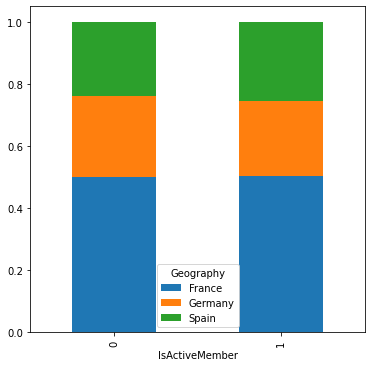

In [89]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(dataset['IsActiveMember'], dataset['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

<AxesSubplot:xlabel='Age'>

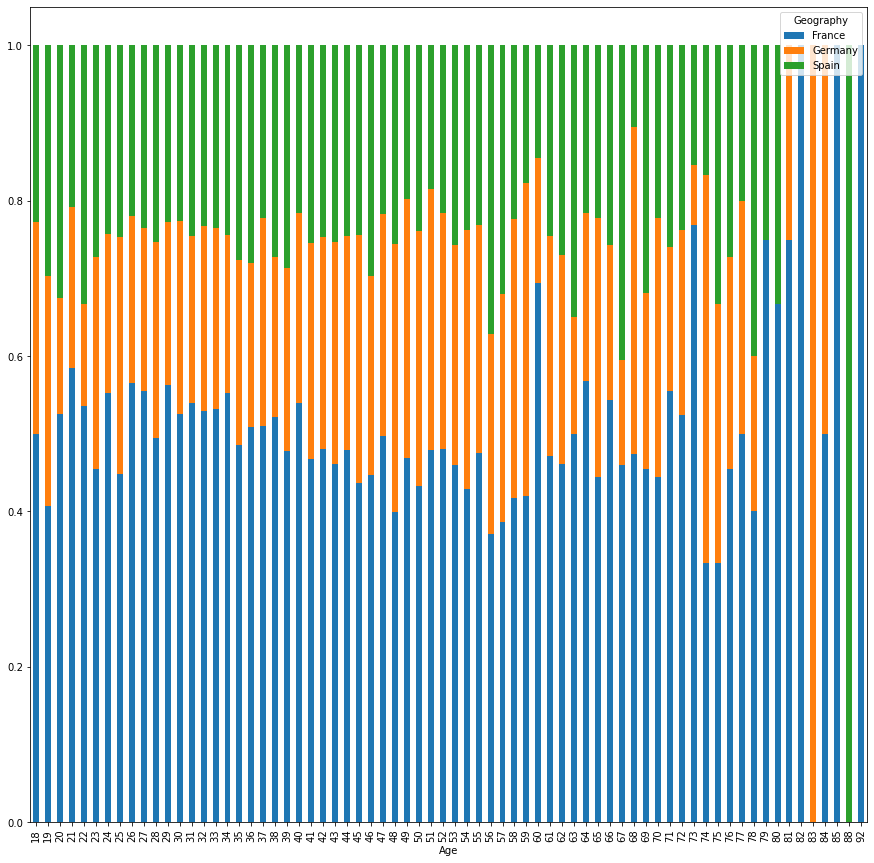

In [90]:
# comparing ages in different geographies

Age = pd.crosstab(dataset['Age'], dataset['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,15))

In [91]:
X = dataset.iloc[:,3:13].values
Y = dataset.iloc[:,13].values   

In [92]:
labelencoder_X_country = LabelEncoder()
X[:, 1] = labelencoder_X_country.fit_transform(X[:, 1])

labelencoder_X_gender = LabelEncoder()
X[:, 2] = labelencoder_X_gender.fit_transform(X[:, 2])  

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
         
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
def build_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=10)) 
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [95]:
cv_classifier = KerasClassifier(build_fn=build_model,batch_size = 25,nb_epoch = 1000)
accuracies = cross_val_score(estimator = cv_classifier, X = X_train, y = y_train, cv = 10)

accuracySum = 0
for accuracy in accuracies:
    accuracySum += accuracy
 
print(accuracySum / accuracies.size)

C:\Users\USER\AppData\Local\Temp/ipykernel_29524/843491324.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cv_classifier = KerasClassifier(build_fn=build_model,batch_size = 25,nb_epoch = 1000)


32/32 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8438
0.8357500016689301


In [96]:
classifier = build_model()
history= classifier.fit(X_train, y_train, batch_size=10, epochs=100)

acc_history = history.history["accuracy"]

loss,accuracy = classifier.evaluate(X_test,y_test)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test,y_pred)

myTest_data = np.array([[2, 500, 0, 42, 8, 150000, 2, 1, 1, 100000]])
myTest_data = sc.transform(myTest_data)

my_tahmin = classifier.predict(myTest_data)
my_tahmin = (my_tahmin > 0.5)

print("Ornek veri tahmini:")
print(my_tahmin)

Epoch 1/100
800/800 [==============================] - 4s 3ms/step - loss: 0.4195 - accuracy: 0.8232
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3593 - accuracy: 0.8510
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3503 - accuracy: 0.8560
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3424 - accuracy: 0.8569
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3378 - accuracy: 0.8622
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3328 - accuracy: 0.8636
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3315 - accuracy: 0.8637
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3282 - accuracy: 0.8639
Epoch 9/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3247 - accuracy: 0.8669
Epoch 10/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3221 - accura

In [97]:
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 83.64999890327454%


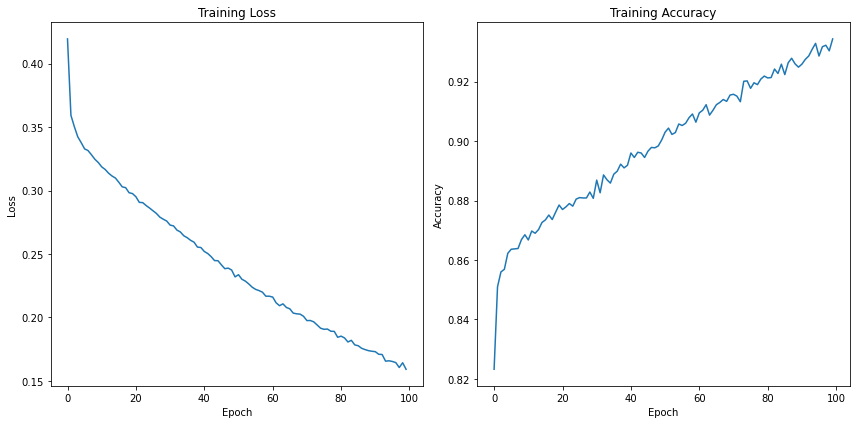

In [99]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()
